#### Customer Churn Analytics :
* Import all Libraries
* Download the data files
* Understanding the data
* Missing value treatment
* Exploratory data analysis
    * Univariate analysis
    * Bivariate analysis
    * Multivariate analysis
* Prepare the data for model
    * Scaling the data
    * One-hot encoding 
* Train and test the model
    * Logistic regression Classification  
    * Evaluate the accuracy, precision, recall, F-score, ROC-AUC curve
    * Naive Bayes 

    


#### Import all Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import warnings; warnings.simplefilter('ignore')

#### Load the dataset

In [2]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/anilak1978/customer_churn/master/Churn_Modeling.csv')


#### Inspect the dataset

In [3]:
customer_data.columns=['RowNumber', 'CustomerId', 'Surname', 'StoreCreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'ShoppingAmount', 'NumOfProducts', 'HasStoreCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
customer_data.drop(['RowNumber', 'CustomerId', 'Surname','EstimatedSalary'],axis=1,inplace=True)
customer_data.head()

,StoreCreditScore,Geography,Gender,Age,Tenure,ShoppingAmount,NumOfProducts,HasStoreCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [4]:
# To avoid data leakage 
customer_train_data=customer_data[:8000]
customer_test_data=customer_data[8000:]

# Look into the datatype of the columns and understand which columns have null values 
customer_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StoreCreditScore  8000 non-null   int64  
 1   Geography         8000 non-null   object 
 2   Gender            8000 non-null   object 
 3   Age               8000 non-null   int64  
 4   Tenure            8000 non-null   int64  
 5   ShoppingAmount    8000 non-null   float64
 6   NumOfProducts     8000 non-null   int64  
 7   HasStoreCard      8000 non-null   int64  
 8   IsActiveMember    8000 non-null   int64  
 9   Exited            8000 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 625.1+ KB


In [18]:
# List of columns having null values
customer_train_data.columns[customer_train_data.isnull().any()].tolist()

#No missing value present

[]

#### Univariate Analysis

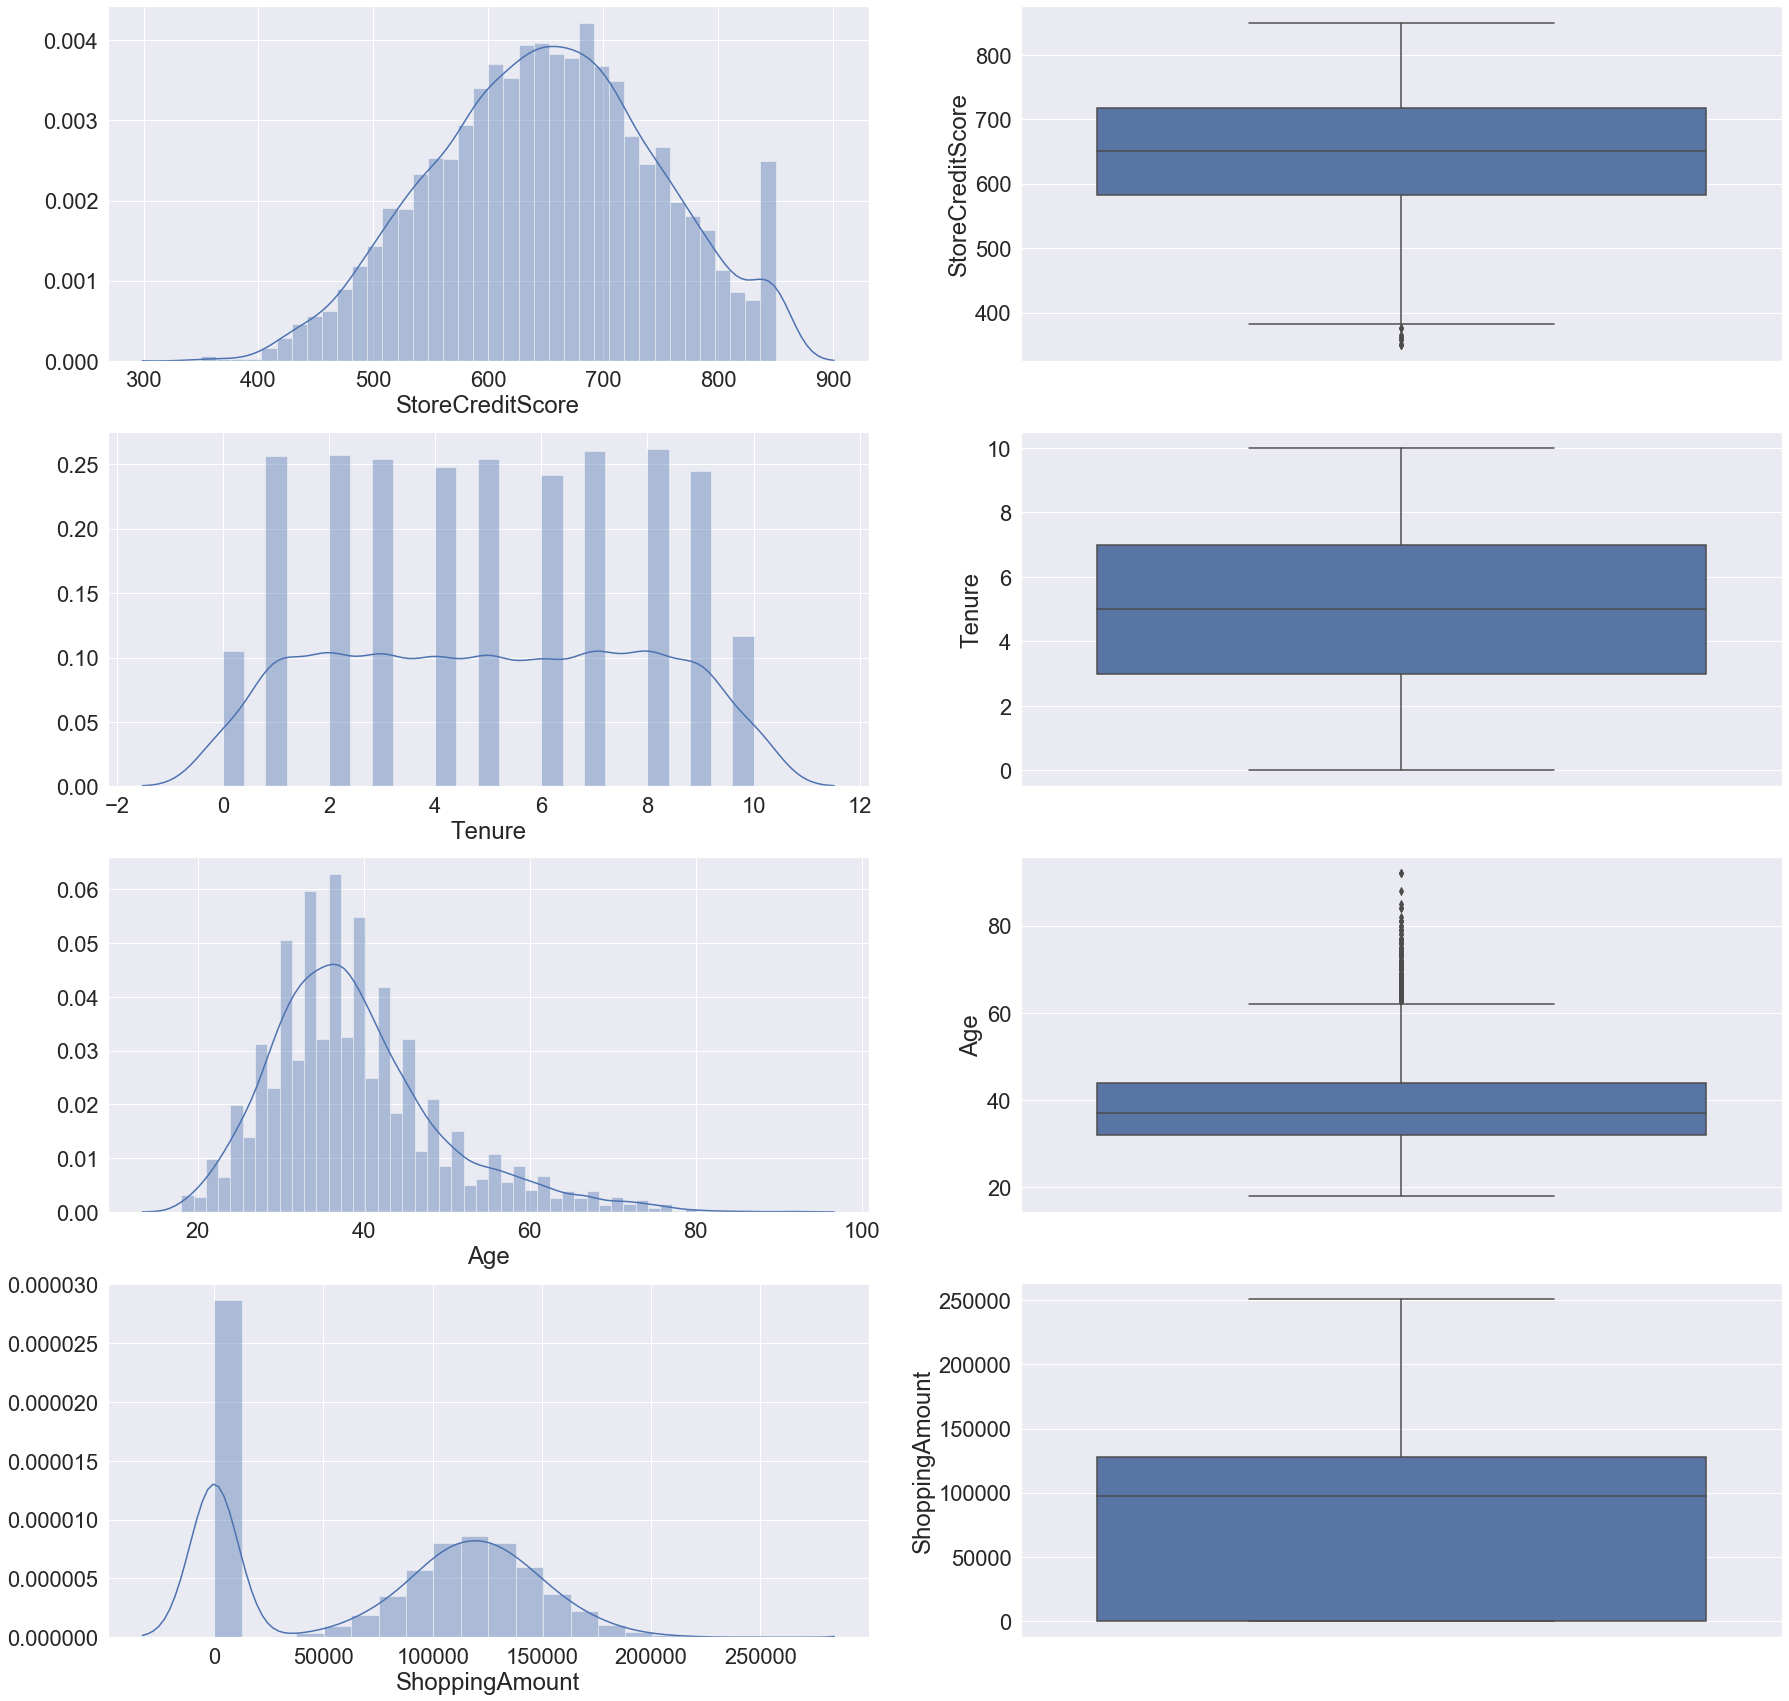

In [28]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4,2,figsize=(30,30))
sns.set(font_scale=2)

sns.distplot(customer_train_data['StoreCreditScore'], color="b",ax=ax1)
sns.boxplot(y='StoreCreditScore',data=customer_train_data,ax=ax2)

sns.distplot(customer_train_data['Tenure'], color="b",ax=ax3)
sns.boxplot(y='Tenure',data=customer_train_data,ax=ax4)

sns.distplot(customer_train_data['Age'], color="b",ax=ax5)
sns.boxplot(y='Age',data=customer_train_data,ax=ax6)

sns.distplot(customer_train_data['ShoppingAmount'], color="b",ax=ax7)
sns.boxplot(y='ShoppingAmount',data=customer_train_data,ax=ax8)


##Age contains outliers 

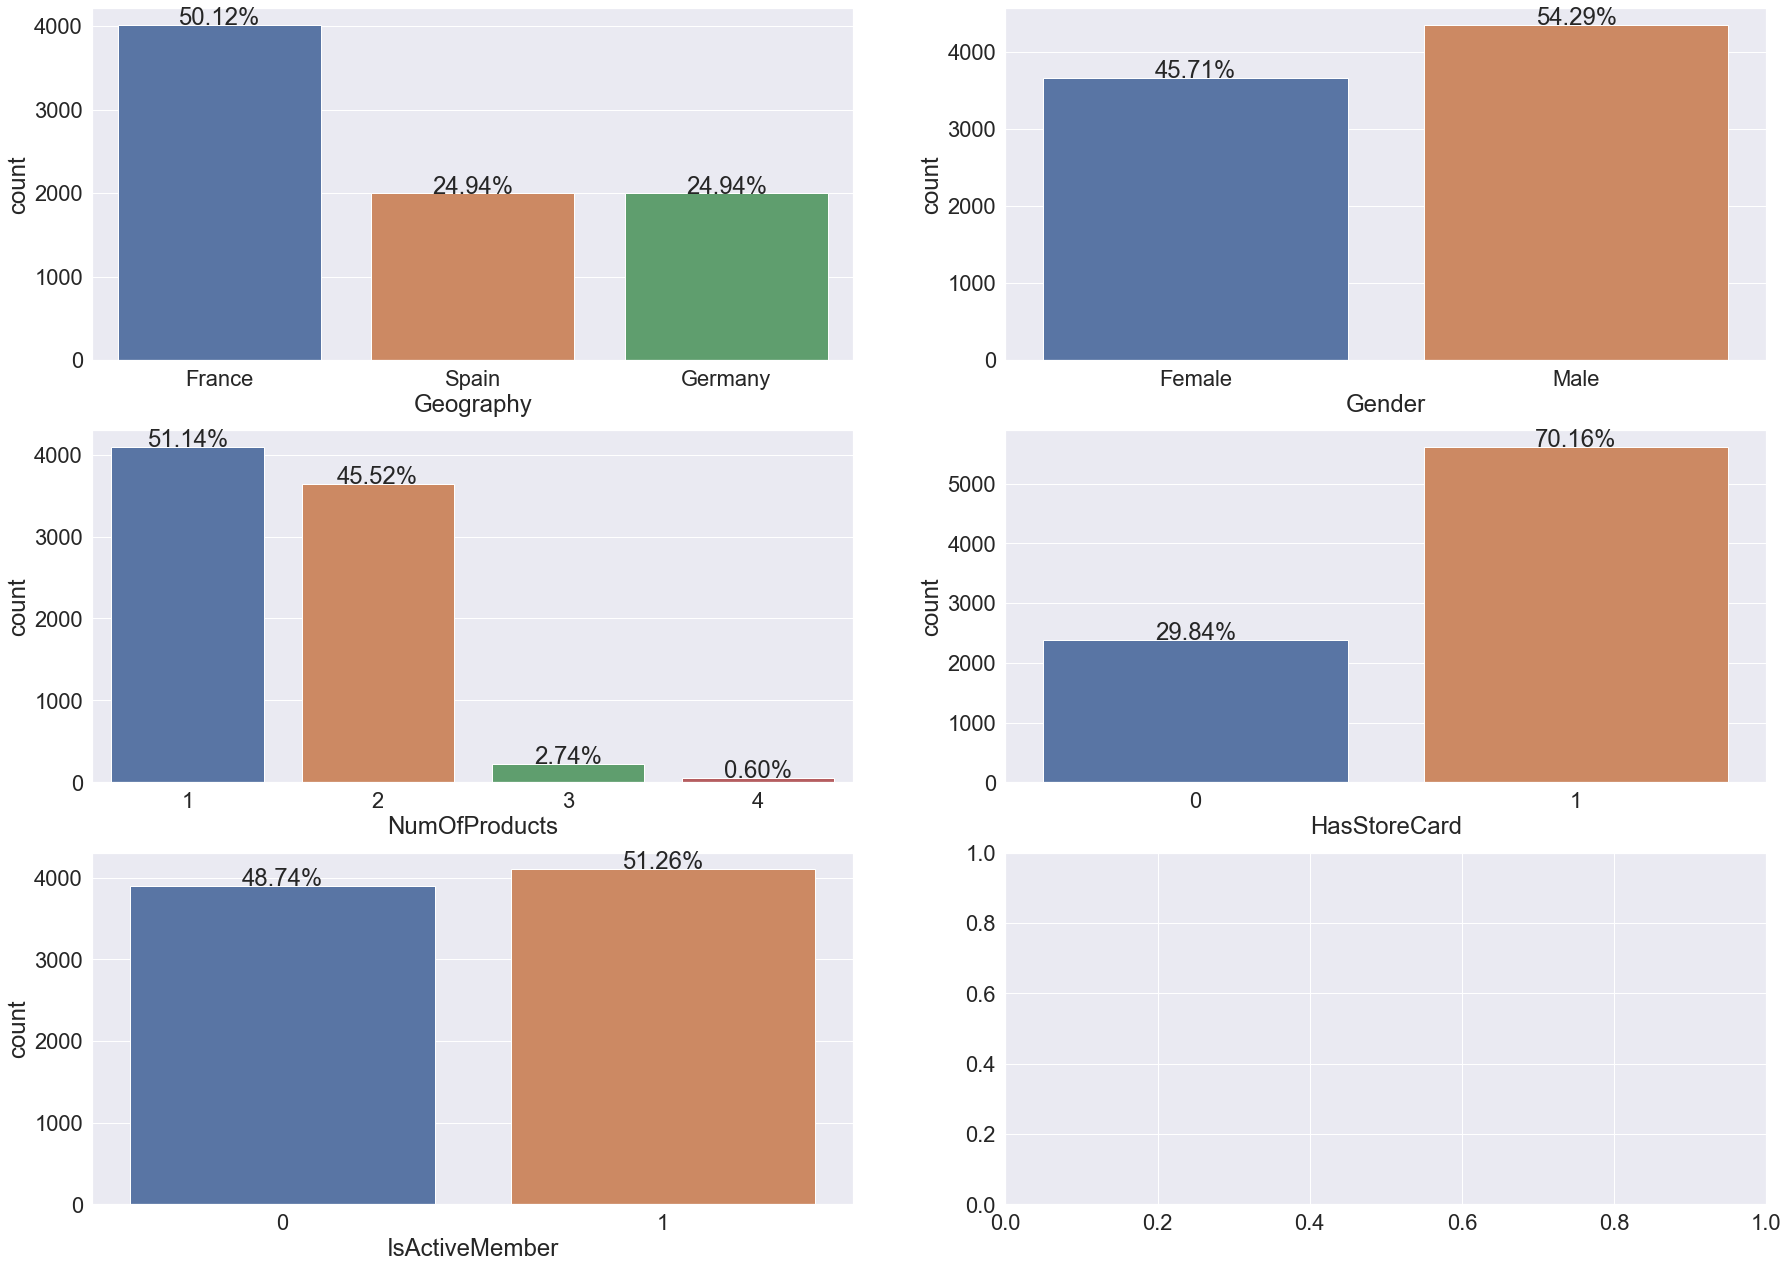

In [36]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,22))
sns.set(font_scale=2)  

sns.countplot('Geography',data=customer_train_data,ax=ax1)
total = float(len(customer_train_data))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

sns.countplot('Gender',data=customer_train_data,ax=ax2)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
        
sns.countplot('NumOfProducts',data=customer_train_data,ax=ax3)
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
    
    
sns.countplot('HasStoreCard',data=customer_train_data,ax=ax4)
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
    
sns.countplot('IsActiveMember',data=customer_train_data,ax=ax5)
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
    
    

#### Bivariate and Multivariate Analysis 

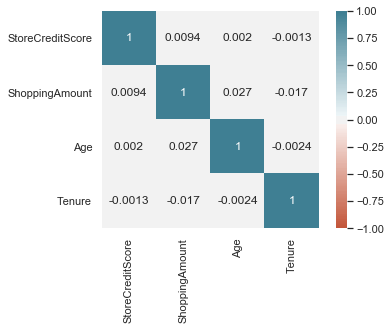

In [40]:
corr = customer_train_data[['StoreCreditScore','ShoppingAmount', 'Age','Tenure']].corr()
sns.set(font_scale=1) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

#No strong correlation among continous variables 

In [80]:
# Chi Square test


data_crosstab = pd.crosstab([customer_train_data.IsActiveMember], [customer_train_data.Exited], margins = False) 
stat, p, dof, expected = chi2_contingency(data_crosstab)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
    


#no of products is correlated with Geography,Gender,IsActiveMember,exited 

probability=0.950, critical=7.815, stat=1.019
Independent (fail to reject H0)


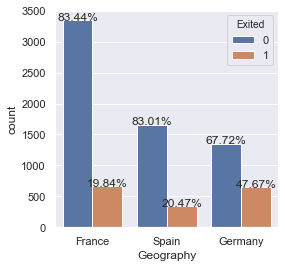

In [85]:
#ax1=sns.countplot('Geography',data=customer_train_data)
ax2=sns.countplot('Geography',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(4,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


* Analysis Results
    * German people are more likely to be churned  

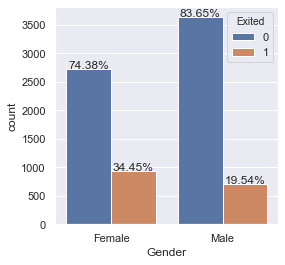

In [87]:
#ax1=sns.countplot('Gender',data=customer_train_data)
ax2=sns.countplot('Gender',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(4,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


* Analysis Results
    * Females are more likely to be churned  

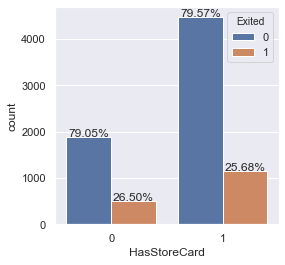

In [92]:
#ax1=sns.countplot('HasStoreCard',data=customer_train_data)
ax2=sns.countplot('HasStoreCard',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(4,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


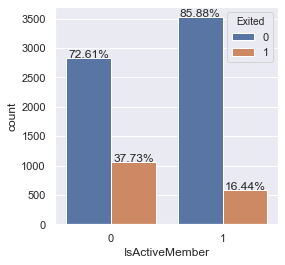

In [94]:
#ax1=sns.countplot('IsActiveMember',data=customer_train_data)
ax2=sns.countplot('IsActiveMember',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(4,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


* Analysis Results
    * Inactive people are more likely to be churned  

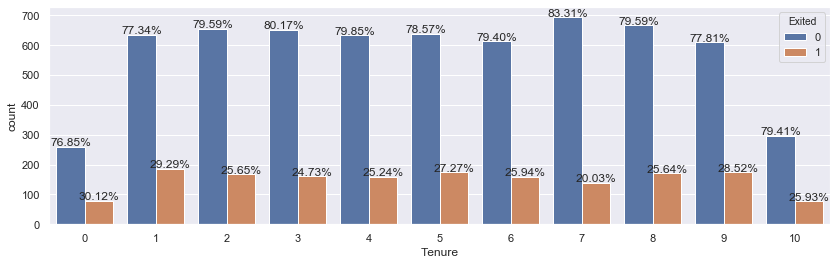

In [142]:
#ax1=sns.countplot('Tenure',data=customer_train_data)
ax2=sns.countplot('Tenure',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(14,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


* Analysis Results
    * Customers having tenure of 1 yr or less are more likely to churn 

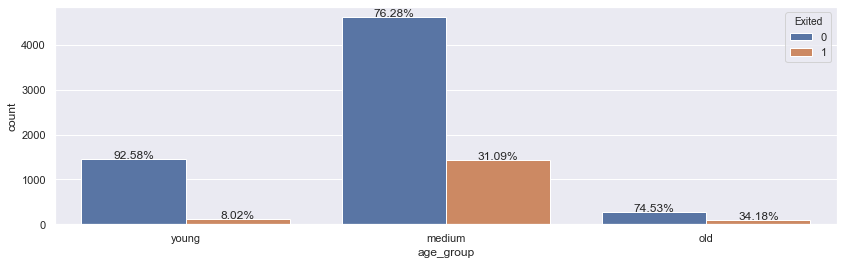

In [154]:
cut_labels_4 = ['young', 'medium', 'old']
cut_bins = [0, 30,  60, 100]
customer_train_data['age_group'] = pd.cut(customer_train_data['Age'], bins=cut_bins, labels=cut_labels_4)

#ax1=sns.countplot('age_group',data=customer_train_data)
ax2=sns.countplot('age_group',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(14,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


* Analysis Results
    * Customers having age >30 are more likely to get churned 

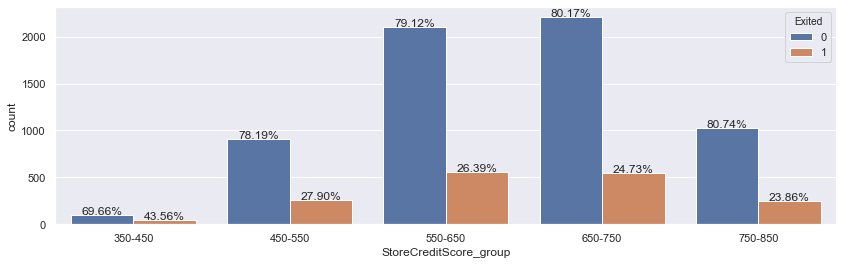

In [159]:
cut_labels_4 = ['350-450', '450-550', '550-650', '650-750', '750-850']
cut_bins = [350, 450, 550, 650,750,850]
customer_train_data['StoreCreditScore_group'] = pd.cut(customer_train_data['StoreCreditScore'], bins=cut_bins, labels=cut_labels_4)

#ax1=sns.countplot('StoreCreditScore_group',data=customer_train_data)
ax2=sns.countplot('StoreCreditScore_group',data=customer_train_data,hue='Exited')
sns.set(rc={'figure.figsize':(14,4)})
#sns.set(font_scale=2)

i=0
z=0
list_1=[]
for q in ax1.patches:
    list_1.append(q.get_height())
        
for p in ax2.patches:
    z=z+1
    total_2=list_1.pop(i)
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total_2)*100),
            ha="center")
    if(z%2==0):i+1


* Analysis Results
    * Customers having a low score are more likely to get churned 

Text(-15.075000000000003, 0.5, 'Shopping amount')

<Figure size 1440x1440 with 0 Axes>

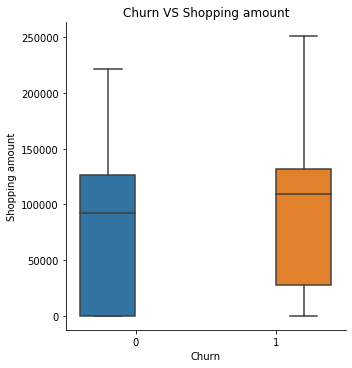

In [10]:
plt.figure(figsize=(20,20))
sns.catplot(x="Exited", y="ShoppingAmount", hue="Exited", kind="box", data=customer_train_data)
plt.title("Churn VS Shopping amount")
plt.xlabel("Churn")
plt.ylabel("Shopping amount")

Text(28.986614583333335, 0.5, 'Shopping amount')

<Figure size 1440x1440 with 0 Axes>

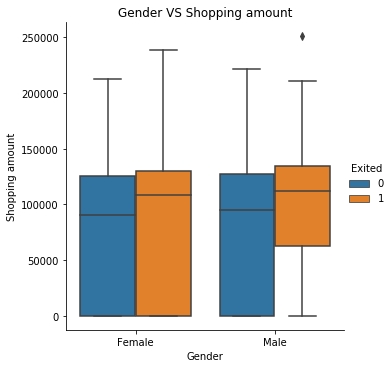

In [8]:
plt.figure(figsize=(20,20))
sns.catplot(x="Gender", y="ShoppingAmount", hue="Exited", kind="box", data=customer_train_data)
plt.title("Gender VS Shopping amount")
plt.xlabel("Gender")
plt.ylabel("Shopping amount")

* Analysis Results
    * Due to high IQR female customers having low shopping amount are more likely to get churned 

#### Prepare the data for model

In [120]:
customer_train_data.drop('NumOfProducts',axis=1,inplace=True)
customer_test_data.drop('NumOfProducts',axis=1,inplace=True)

y_train=pd.DataFrame(customer_train_data['Exited'])
X_train=customer_train_data.drop('Exited',axis=1)

y_test=pd.DataFrame(customer_test_data['Exited'])
X_test=customer_test_data.drop('Exited',axis=1)

In [121]:
for var in X_train.columns:
    if((var == 'Age') | (var == 'StoreCreditScore')|(var == 'ShoppingAmount')|(var == 'IsActiveMember')|(var == 'HasStoreCard') |(var == 'Tenure')|(var == 'NumOfProducts') ):
        print(var)
    else:
        X_train = pd.concat([X_train,pd.get_dummies(X_train[var], prefix=var, drop_first=True)],axis=1)
        X_train.drop([var],axis=1, inplace=True)



StoreCreditScore
Age
Tenure
ShoppingAmount
HasStoreCard
IsActiveMember


In [122]:
for var in X_test.columns:
    if((var == 'Age') | (var == 'StoreCreditScore')|(var == 'ShoppingAmount')|(var == 'IsActiveMember')|(var == 'HasStoreCard') |(var == 'Tenure')|(var == 'NumOfProducts') ):
        print(var)
    else:
        X_test = pd.concat([X_test,pd.get_dummies(X_test[var], prefix=var, drop_first=True)],axis=1)
        X_test.drop([var],axis=1, inplace=True)



StoreCreditScore
Age
Tenure
ShoppingAmount
HasStoreCard
IsActiveMember


In [123]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
model = LogisticRegression(C=100000, fit_intercept=False)
model = model.fit(X_train,y_train)

y_pred=model.predict(X_test)
model.score(X_test,y_test)
#Accuracy is 79.65%

0.7965

In [127]:
confusion_matrix(y_test,y_pred)
#Out of all the positive classes, how much we predicted correctly. 
##Recall:92.5% 

#Out of all the positive classes we have predicted correctly, how many are actually positive. 
##Precision:84.1% 


array([[1482,  128],
       [ 279,  111]], dtype=int64)

In [128]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)
#0.35

0.3529411764705882

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722


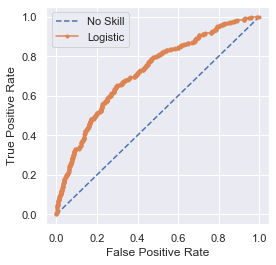

In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [134]:

model=GaussianNB()
model.fit(X_train,y_train)
accuracy_score(y_test,model.predict(X_test))

#79.85%

0.7985

#### END